In [1]:
#https://www.stefanfiott.com/machine-learning/cifar-10-classifier-using-cnn-in-pytorch/

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
# This is the two-step process used to prepare the
# data for use with the convolutional neural network.

# First step is to convert Python Image Library (PIL) format
# to PyTorch tensors.

# Second step is used to normalize the data by specifying a 
# mean and standard deviation for each of the three channels.
# This will convert the data from [0,1] to [-1,1]

# Normalization of data should help speed up conversion and
# reduce the chance of vanishing gradients with certain 
# activation functions.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/Users/wdz/pytorch/CIFAR-10 classifier/data', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


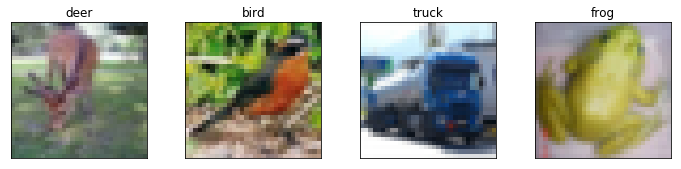

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

dataiter = iter(trainloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [15]:
import os

model_directory_path = '/Users/wdz/pytorch/CIFAR-10 classifier/model/'
model_path = model_directory_path + 'cifar-10-cnn-model.pt'

if not os.path.exists(model_directory_path):
    os.makedirs(model_directory_path)

if os.path.isfile(model_path):
    # load trained model parameters from disk
    net.load_state_dict(torch.load(model_path))
    print('Loaded model parameters from disk.')
else:
    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training.')
    torch.save(net.state_dict(), model_path)
    print('Saved model parameters to disk.')

[1,  2000] loss: 2.222
[1,  4000] loss: 1.933
[1,  6000] loss: 1.705
[1,  8000] loss: 1.632
[1, 10000] loss: 1.545
[1, 12000] loss: 1.469
[2,  2000] loss: 1.430
[2,  4000] loss: 1.397
[2,  6000] loss: 1.371
[2,  8000] loss: 1.363
[2, 10000] loss: 1.330
[2, 12000] loss: 1.316
Finished Training.
Saved model parameters to disk.


In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

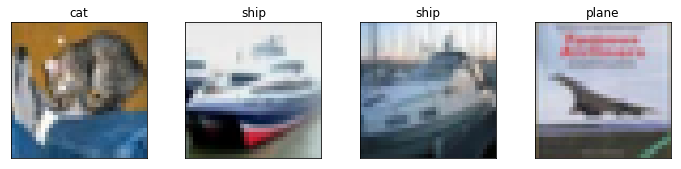

In [18]:
dataiter = iter(testloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [19]:
outputs = net(images)

In [20]:
outputs

tensor([[-0.4072, -1.9488,  0.3148,  2.7449,  0.4433,  2.7169,  0.5856,  0.2283,
         -2.7956, -1.2366],
        [ 4.9432,  3.9352, -1.1572, -2.6014, -1.2282, -4.4477, -4.0621, -4.7007,
          6.2706,  2.2974],
        [ 2.1190,  1.3911, -0.3922, -1.0265, -0.7767, -2.2985, -1.8384, -2.0042,
          3.0383,  1.2011],
        [ 4.2614,  1.2835,  0.7774, -1.6934, -0.0071, -3.4283, -2.9640, -2.1755,
          3.2461,  0.5029]], grad_fn=<AddmmBackward>)

In [21]:
sm = nn.Softmax(dim=1)
sm_outputs = sm(outputs)
print(sm_outputs)

tensor([[1.7589e-02, 3.7647e-03, 3.6208e-02, 4.1133e-01, 4.1172e-02, 3.9997e-01,
         4.7467e-02, 3.3209e-02, 1.6143e-03, 7.6746e-03],
        [1.9185e-01, 7.0022e-02, 4.3016e-04, 1.0149e-04, 4.0066e-04, 1.6017e-05,
         2.3553e-05, 1.2436e-05, 7.2353e-01, 1.3612e-02],
        [2.1660e-01, 1.0461e-01, 1.7582e-02, 9.3240e-03, 1.1970e-02, 2.6132e-03,
         4.1402e-03, 3.5077e-03, 5.4315e-01, 8.6503e-02],
        [6.7268e-01, 3.4239e-02, 2.0641e-02, 1.7445e-03, 9.4192e-03, 3.0776e-04,
         4.8963e-04, 1.0772e-03, 2.4371e-01, 1.5686e-02]],
       grad_fn=<SoftmaxBackward>)


In [22]:
probs, index = torch.max(sm_outputs, dim=1)

for p, i in zip(probs, index):
    print('{0} - {1:.4f}'.format(classes[i], p))

cat - 0.4113
ship - 0.7235
ship - 0.5431
plane - 0.6727


In [23]:
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 54.93%


In [24]:
print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))

Category   - Accuracy
plane      - 67.7
car        - 67.2
bird       - 42.1
cat        - 23.6
deer       - 43.0
dog        - 47.2
frog       - 72.4
horse      - 56.4
ship       - 74.2
truck      - 55.5


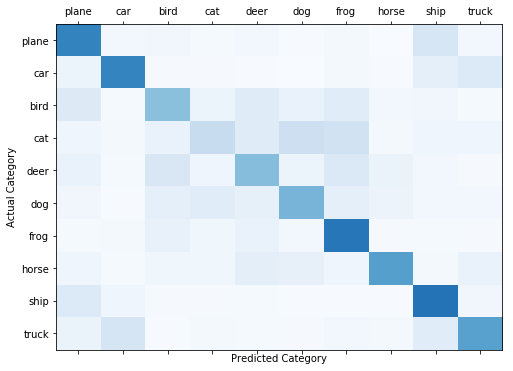

In [25]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.matshow(confusion_matrix, aspect='auto', vmin=0, vmax=1000, cmap=plt.get_cmap('Blues'))
plt.ylabel('Actual Category')
plt.yticks(range(10), classes)
plt.xlabel('Predicted Category')
plt.xticks(range(10), classes)
plt.show()

In [26]:
print('actual/pred'.ljust(16), end='')
for i,c in enumerate(classes):
    print(c.ljust(10), end='')
print()
for i,r in enumerate(confusion_matrix):
    print(classes[i].ljust(16), end='')
    for idx, p in enumerate(r):
        print(str(p).ljust(10), end='')
    print()
    
    r = r/np.sum(r)
    print(''.ljust(16), end='')
    for idx, p in enumerate(r):
        print(str(p).ljust(10), end='')
    print()

actual/pred     plane     car       bird      cat       deer      dog       frog      horse     ship      truck     
plane           677       28        34        13        31        4         19        2         163       29        
                0.677     0.028     0.034     0.013     0.031     0.004     0.019     0.002     0.163     0.029     
car             54        672       9         8         6         2         20        5         91        133       
                0.054     0.672     0.009     0.008     0.006     0.002     0.02      0.005     0.091     0.133     
bird            129       15        421       53        119       69        117       27        35        15        
                0.129     0.015     0.421     0.053     0.119     0.069     0.117     0.027     0.035     0.015     
cat             42        22        70        236       118       214       190       20        43        45        
                0.042     0.022     0.07      0.236     0.118   